Importing Libraries and Setup

This section imports necessary libraries like pandas, numpy, nltk, and machine learning libraries from sklearn. The movie_reviews dataset is loaded from NLTK, and a utility function review_to_string() is defined to convert reviews into strings.

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

Data Preprocessing

Positive and Negative Reviews: Positive and negative review files are collected and transformed into a string format.
Labels: A numpy array is created where positive reviews are labeled as 1 and negative reviews as 0.

In [3]:
positive_reviews = movie_reviews.fileids('pos')
negative_reviews = movie_reviews.fileids('neg')

In [4]:
def review_to_string(review):
    words = movie_reviews.words(review)
    return " ".join(words).replace(" ,", ",").replace(" .", ".").replace(" '", "'").replace(" '", "'")

In [5]:
reviews = [review_to_string(file) for file in positive_reviews + negative_reviews]

In [6]:
labels = np.array([1]*len(positive_reviews) + [0]*len(negative_reviews))


Data Visualisation 

Distribution of Sentiments: A count plot visualizes the distribution of positive and negative reviews using Seaborn with custom styling for a more polished appearance.
Word Cloud: Two word clouds are generated—one for positive reviews (in blue) and one for negative reviews (in red), showcasing frequently used words in both types of reviews.

C:\Users\vaibh\AppData\Local\Temp\ipykernel_24308\2328099601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='coolwarm')


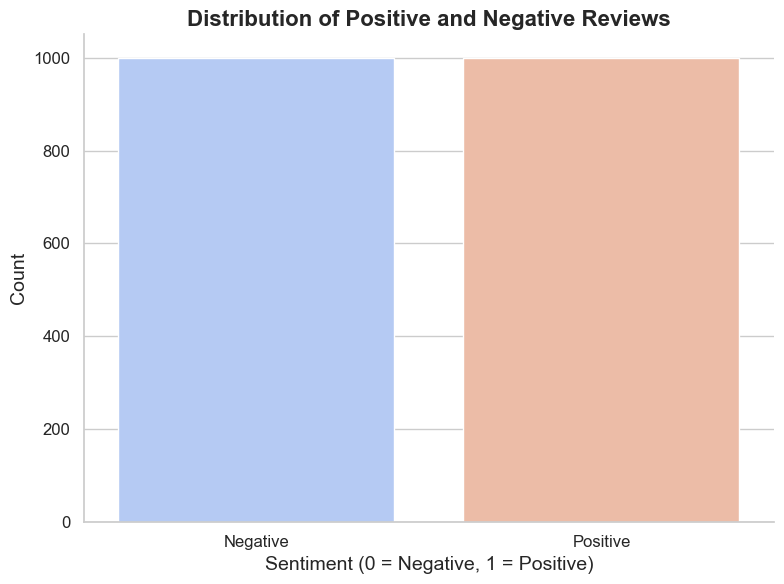

In [7]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(8, 6))
sns.countplot(x=labels, palette='coolwarm')
plt.title('Distribution of Positive and Negative Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()


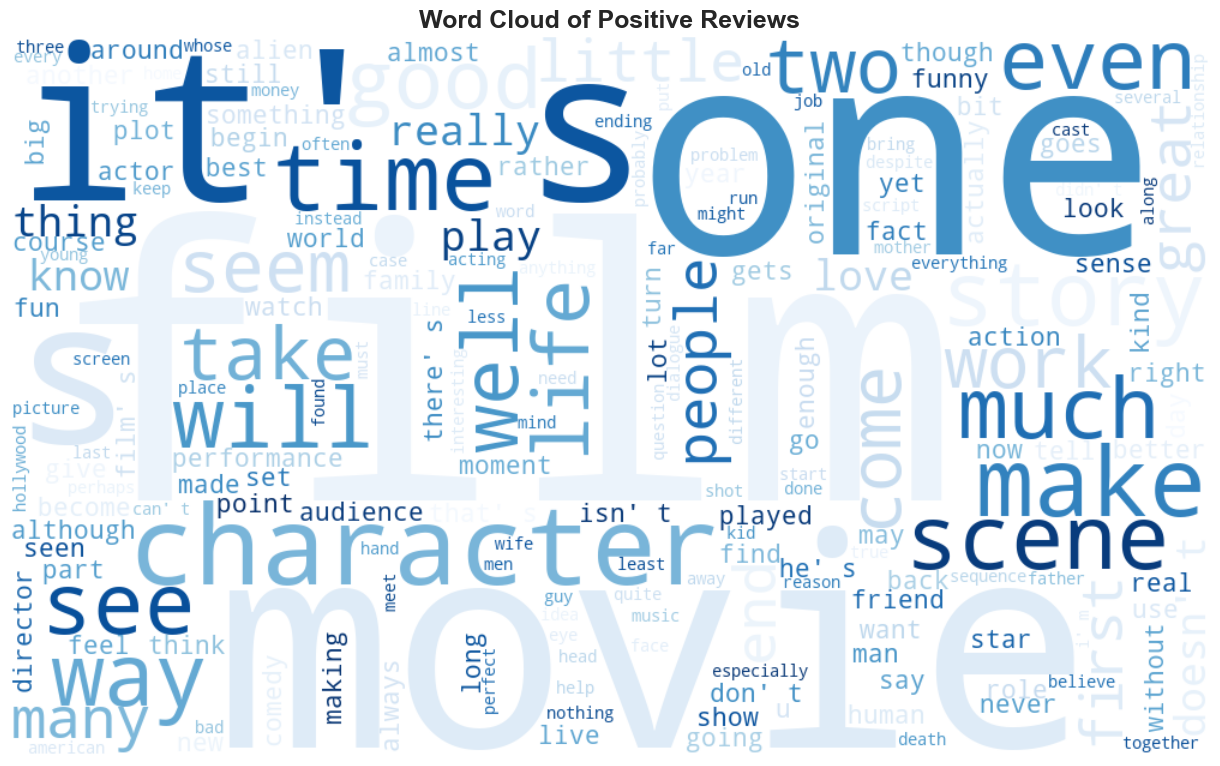

In [8]:
from wordcloud import WordCloud
positive_text = " ".join([review_to_string(file) for file in positive_reviews])
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='Blues').generate(positive_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews", fontsize=18, fontweight='bold')
plt.tight_layout(pad=0)
plt.show()


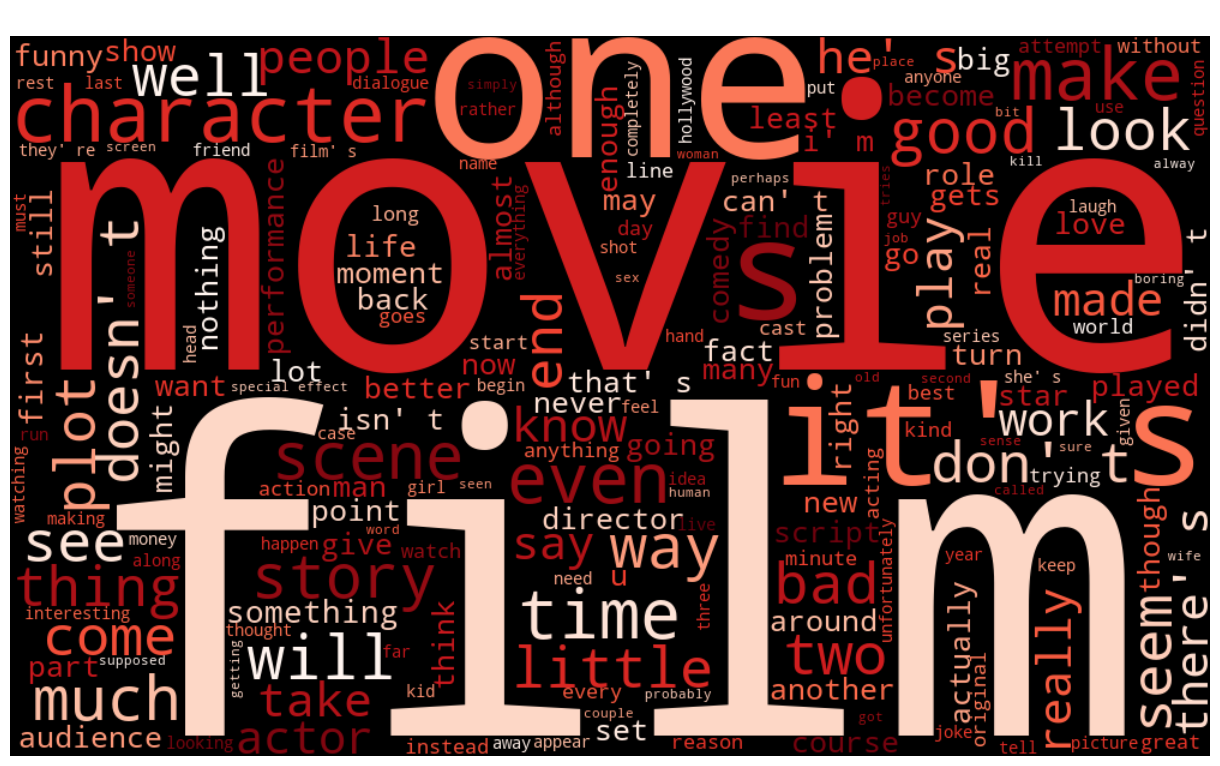

In [9]:
negative_text = " ".join([review_to_string(file) for file in negative_reviews])
wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative Reviews", fontsize=18, fontweight='bold', color='white')
plt.tight_layout(pad=0)
plt.show()


In [10]:
def train_and_evaluate(X_train, X_test, y_train, y_test, classifier, name):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    return accuracy

Feature Extraction

Two methods are used to extract features from the review texts:

Count Vectorizer: Creates a document-term matrix using word frequency.

TF-IDF Vectorizer: Weighs words based on their frequency and importance across the corpus.

In [11]:
count_vect = CountVectorizer(min_df=2, stop_words='english')
X_count = count_vect.fit_transform(reviews)

In [12]:
tfidf_vect = TfidfVectorizer(min_df=2, stop_words='english')
X_tfidf = tfidf_vect.fit_transform(reviews)

Splitting data into training set and test set

The data is split into training and test sets using train_test_split. Both CountVectorizer and TfidfVectorizer data are split for each model comparison.

In [13]:
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, labels, test_size=0.25, random_state=5)
X_train_tfidf, X_test_tfidf = train_test_split(X_tfidf, test_size=0.25, random_state=5)

Model Implementation and Evaluation

Three classifiers are implemented: Multinomial Naive Bayes, Logistic Regression, and Support Vector Machine (SVM).

The accuracy of each model is computed, and a confusion matrix is printed for performance evaluation.

In [14]:
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear')
}

In [15]:
results = {}

In [16]:
print("Results using Count Vectorizer:")
for name, clf in classifiers.items():
    accuracy = train_and_evaluate(X_train_count, X_test_count, y_train, y_test, clf, name)
    results[f'{name} (Count Vectorizer)'] = accuracy

Results using Count Vectorizer:

Multinomial Naive Bayes Accuracy: 0.8040
Confusion Matrix:
[[204  38]
 [ 60 198]]

Logistic Regression Accuracy: 0.8540
Confusion Matrix:
[[210  32]
 [ 41 217]]

Support Vector Machine Accuracy: 0.8340
Confusion Matrix:
[[205  37]
 [ 46 212]]


In [17]:
print("\nResults using TF-IDF:")
for name, clf in classifiers.items():
    accuracy = train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, clf, name)
    results[f'{name} (TF-IDF)'] = accuracy


Results using TF-IDF:

Multinomial Naive Bayes Accuracy: 0.7980
Confusion Matrix:
[[208  34]
 [ 67 191]]

Logistic Regression Accuracy: 0.8300
Confusion Matrix:
[[200  42]
 [ 43 215]]

Support Vector Machine Accuracy: 0.8480
Confusion Matrix:
[[204  38]
 [ 38 220]]


A confusion matrix is plotted for the Naive Bayes model using the TF-IDF vectorizer. It uses Seaborn's heatmap for aesthetic appeal.

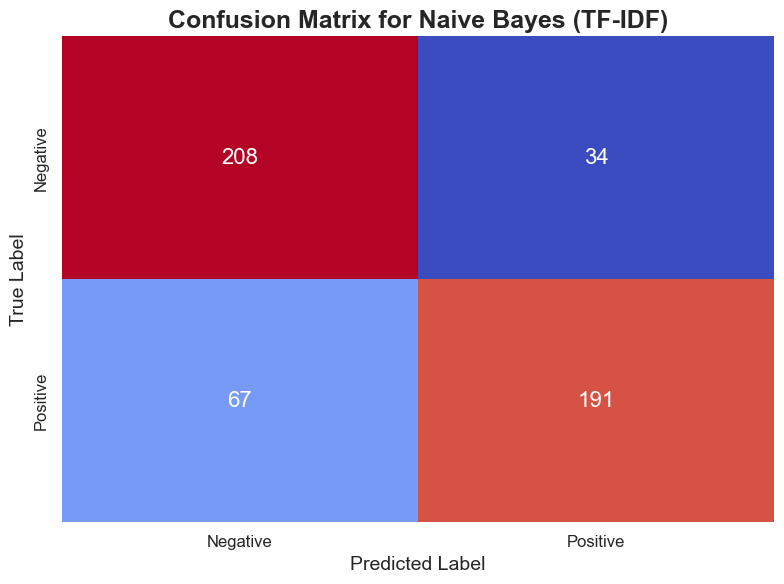

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
clf_tf = MultinomialNB()
clf_tf.fit(X_train_tfidf, y_train)
y_pred_tf = clf_tf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred_tf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', cbar=False, annot_kws={"size":16})
plt.title('Confusion Matrix for Naive Bayes (TF-IDF)', fontsize=18, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], fontsize=12)
plt.tight_layout()
plt.show()


A bar plot shows the accuracies of all classifiers, both for the Count Vectorizer and TF-IDF vectorizer. The bar heights represent the accuracy scores of each model, and annotations provide the exact values.

C:\Users\vaibh\AppData\Local\Temp\ipykernel_24308\633520108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='magma')


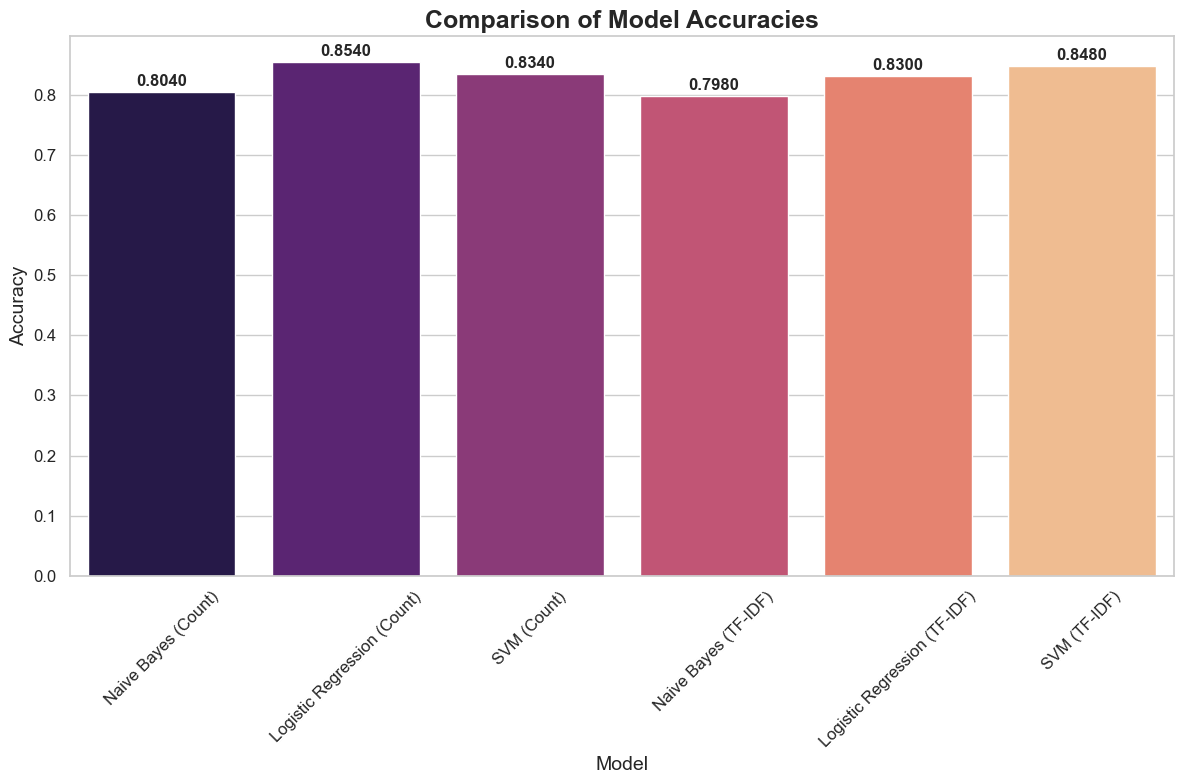

In [19]:
model_names = ['Naive Bayes (Count)', 'Logistic Regression (Count)', 'SVM (Count)',
               'Naive Bayes (TF-IDF)', 'Logistic Regression (TF-IDF)', 'SVM (TF-IDF)']
accuracies = [results['Multinomial Naive Bayes (Count Vectorizer)'], 
              results['Logistic Regression (Count Vectorizer)'], 
              results['Support Vector Machine (Count Vectorizer)'], 
              results['Multinomial Naive Bayes (TF-IDF)'], 
              results['Logistic Regression (TF-IDF)'], 
              results['Support Vector Machine (TF-IDF)']]
plt.figure(figsize=(12, 8))
sns.barplot(x=model_names, y=accuracies, palette='magma')
plt.title('Comparison of Model Accuracies', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


The ROC curve (Receiver Operating Characteristic) is plotted for Naive Bayes (TF-IDF) to evaluate the model's ability to differentiate between positive and negative reviews. The Area Under the Curve (AUC) is calculated to summarize the model’s performance.

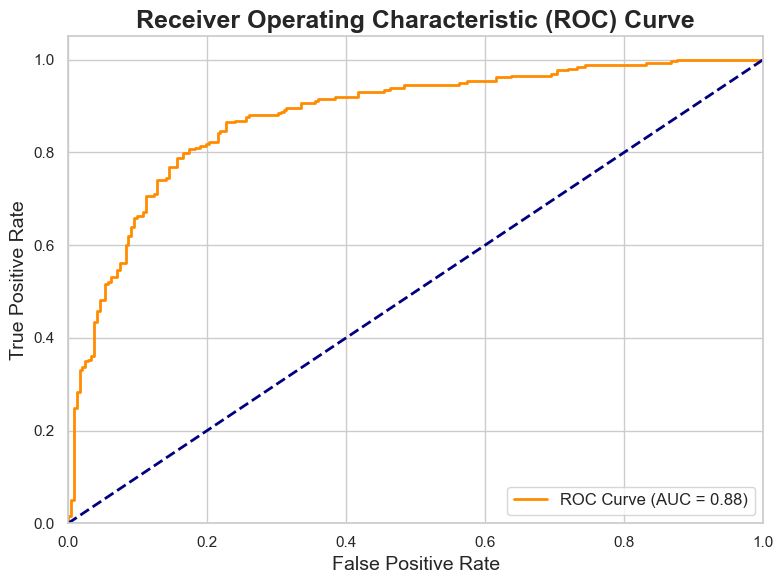

In [20]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, clf_tf.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.show()


In [21]:
print("\nComparison of all models:")
for model_name, accuracy in sorted(results.items(), key=lambda item: item[1], reverse=True):
    print(f"{model_name}: {accuracy:.4f}")


Comparison of all models:
Logistic Regression (Count Vectorizer): 0.8540
Support Vector Machine (TF-IDF): 0.8480
Support Vector Machine (Count Vectorizer): 0.8340
Logistic Regression (TF-IDF): 0.8300
Multinomial Naive Bayes (Count Vectorizer): 0.8040
Multinomial Naive Bayes (TF-IDF): 0.7980
